# Data Science Pragmatic programming Modelling in Python


Code snippets for quick consult (copy n paste)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
!pwd

/mnt/sdb1/leandro/ds_pragmatic_programming


## Model validation

* k-fold
* split train, val n test

In [29]:
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split

# get some data
X, y = load_digits(return_X_y=True) # Multiclass
#X, y = make_moons()  ## binary classifier

print(f"X shape: {X.shape}")
print(f"y labels: {np.unique(y)}")

print()
print("Split dataset:")
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.33, random_state=42)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

X shape: (1797, 64)
y labels: [0 1 2 3 4 5 6 7 8 9]

Split dataset:
X train shape: (1203, 64)
X test shape: (594, 64)


## Sampling Imbalance data


Install imbalanced-learn
```sh
conda install -c conda-forge imbalanced-learn 
```



https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

<img src="images/resampling.png" width="800" align="left"/>


Types of sampling

* Under
    * Random  (code snippet)
    * Tomek links  (TODO) (This can be usefull for KNNN or SVM to define better regions)

<img src="images/tomek.png" width="800" align="left"/>  


* Over
    * Random (code snippet)
    * SMOTE  (TODO)


<img src="images/smote.png" width="800" align="left"/>   
    

* **Genreate unbalanced data**

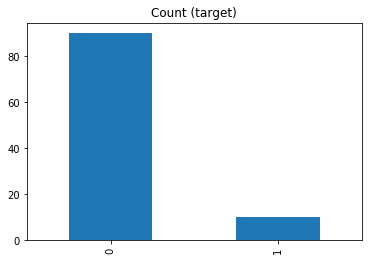

In [30]:
from sklearn.datasets import make_classification


X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

* **Random under sampling**

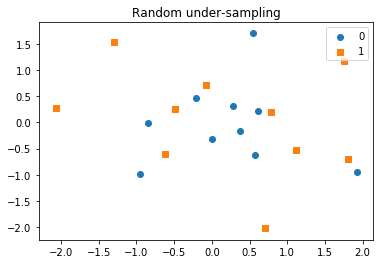

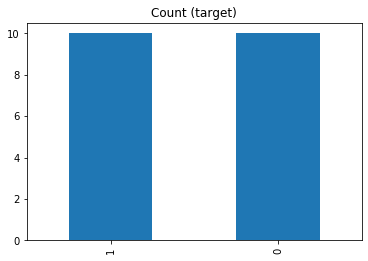

In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

df2 = pd.DataFrame(X_rus)
df2['target'] = y_rus
df2.target.value_counts().plot(kind='bar', title='Count (target)');


* **Random over sampling**

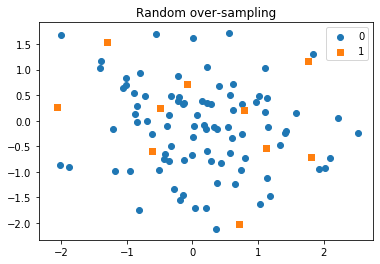

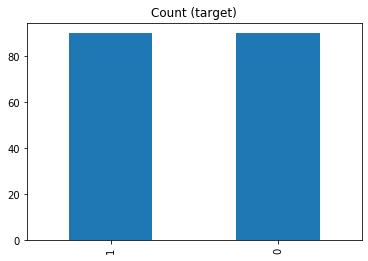

In [32]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

df2 = pd.DataFrame(X_ros)
df2['target'] = y_ros
df2.target.value_counts().plot(kind='bar', title='Count (target)');


## Model tunning

refs:
* https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff

**For tune deep learning see deep learning notebook**

    1. gridseach
    2. sthocastic search
    3. bobh Auto-ml
   


### KNN

Ref:
* https://scikit-learn.org/stable/modules/neighbors.html 
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

> Important Note: You might want to have K odd to avoid ties (i.e., if K = 4, this could result in a 2 Yes and 2 No, which would confuse the classifier). But you might want the classifier to return NOT sure. SO is optional. See the 2 tune to see that allows even numbers allows us to discover that K = 10 is actually the best option.


* decrease K: reduce bias and increase variance error (double check as well).  


In [7]:
from sklearn.model_selection import train_test_split

#read in the data using pandas
df = pd.read_csv('data/diabetes_data.csv')

df.head()

# explainers
X = df.drop(columns=['diabetes']).to_numpy()

#separate target values
y = df['diabetes'].values


print(f"X shape: {X.shape}")
print(f"y labels: {np.unique(y)}")

print()
print("Split dataset:")
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.33, random_state=42)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


X shape: (768, 8)
y labels: [0 1]

Split dataset:
X train shape: (514, 8)
X test shape: (254, 8)


Best (k,score): (9, 0.5764705882352942)


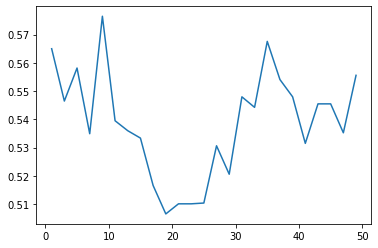

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

best_k = 0
best_score = 0

neighbors = range(1,50,2) # min_k = 1, max_k = 25, odd numbers 

scores = list()
for k in neighbors:

        knn = KNeighborsClassifier(n_neighbors=k)
        _ = knn.fit(X_train, y_train)
        
        y_pred = knn.predict(X_test)
        f1 = f1_score(y_test, y_pred)
        
        scores.append((k,f1))
        if f1 > best_score:
            best_k = k
            best_score = f1


print(f"Best (k,score): {(best_k, best_score)}")

k = [s[0] for s in scores ]
s = [s[1] for s in scores ]

plt.plot(k, s)

In [19]:
%%time
from sklearn.model_selection import GridSearchCV

# optional you can do
# all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

knn = KNeighborsClassifier()

# using cross k-fold
# Scoring is attribute of the estimator (Classifier). To get the deafult we should look in the 
# estimator doc. 
# For knn it is mean accuracy for binary
# If you want to pass the metric See Random Forest Random Search
search = GridSearchCV(knn, param_grid, cv=5)

#fit model to data
search.fit(X_train, y_train)

CPU times: user 465 ms, sys: 0 ns, total: 465 ms
Wall time: 449 ms


/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
search.best_params_
print()
#search.get_params() # prints all parameters as dict
search.best_score_
print()
search.best_estimator_

{'n_neighbors': 10}

{'cv': 5,
 'error_score': 'raise-deprecating',
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'iid': 'warn',
 'n_jobs': None,
 'param_grid': {'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24])},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

0.7354085603112841

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [13]:
from sklearn.metrics import accuracy_score
knn_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

knn_best.fit(X_train,y_train)

y_pred = knn_best.predict(X_train)
f1 = f1_score(y_train, y_pred)

print(f"train: f score: {f1}")

y_pred = knn_best.predict(X_test)
f1 = f1_score(y_test, y_pred)

print(f"test: f score: {f1}")

acc = accuracy_score(y_test, y_pred)
print(f"test acc: {acc}")

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

train: f score: 0.6229508196721312
test: f score: 0.48951048951048953
test acc: 0.7125984251968503


### Random Forest


The strenght in the random forest is related the hability to make uncorrelated 

* **n_estimators**: #decision trees in the forest. (default=100)
    * more uncorrelated trees in the model, better is the for the model. But more tree increase CPU time. 
    * After certain number of trees, there is statistical evidence of diminishing of returns.
    * more tree: more overfitting
    
* **max_depth**: max depth of the tree. (default=None)
    * None: means the tree are expand where all the leaves are pure or until all leaves contain less than **min_samples_split**
    * increasing: leads to overfitting (reduce bias)

* **min_samples_split**: min #samples required to split an internal node (deafult=
    * high values: more "clustered" the decision will be. You migh have more samples of mixed classes, because the the decision will be the same for all samples in the node
    
* **min_sample_leaf**: min #samples needed at each leaf (default=1) 
    * simililar to **min_samples_split**, if you do not allow the model to split (say because **n_sample_leaf** too high), the model can over generalize measning high bias
    * increase: increase bias error and reduce variance
    



In [ ]:
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split

# get some data
X, y = load_digits(return_X_y=True) # Multiclass
#X, y = make_moons()  ## binary classifier

print(f"X shape: {X.shape}")
print(f"y labels: {np.unique(y)}")

print()
print("Split dataset:")
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.33, random_state=42)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

In [17]:
## list all possible scores to be used
# See this: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [14]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import cohen_kappa_score,  make_scorer, balanced_accuracy_score

kappa_scorer = make_scorer(cohen_kappa_score)

param_space = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100,150,200],
    'max_depth': [None, 1,3,5,10],
    'min_samples_split': [5,10],
    'min_samples_leaf': [5,10]
}



clf = RandomizedSearchCV(RandomForestClassifier(), param_space, 
                         scoring = kappa_scorer,
                         n_iter=25,random_state=0)
search = clf.fit(X_train, y_train)

/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 11.6 s, sys: 66.7 ms, total: 11.6 s
Wall time: 11.2 s


In [15]:
search.best_params_
print()
search.best_score_
print()
search.best_estimator_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_depth': 10,
 'criterion': 'entropy'}

0.47722147864896247

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

rf_best.fit(X_train,y_train)

y_pred = rf_best.predict(X_train)
kappa = cohen_kappa_score(y_train, y_pred)

print(f"train kappa: {kappa}")

y_pred = rf_best.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"test kappa: {f1}")

acc = balanced_accuracy_score(y_test, y_pred)
print(f"test acc: {acc}")


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

train kappa: 0.8346819243660494
test kappa: 0.48951048951048953
test acc: 0.7452242524916943


### Ada n Gradient Boosting

ref:
* https://medium.com/@aln.deaguiar/xgboost-a-matem%C3%A1tica-passo-a-passo-29d34fa561dc

* **n_estimators**: boosting will build n_estimators #decision trees. Each one will improve the results of the previous one. (default=50)

* **learning_rate**: is rate boosting is adjusting the wieghts with respect the loss
    * lower: slow is the learning you migh need more trees
    * trade-off with **n_estimators**: low
    * high learning rate reduce how much one tree learns leaving the rest to be learned to the next trees.
    
    
**Double check**
$
w_{j-1} = w_j
$

where $w_j$ is the weights given to each sample at the iteration $j$ **Double check**

In [21]:
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split

# get some data
#X, y = load_digits(return_X_y=True) # Multiclass
X, y = make_moons()  ## binary classifier

print(f"X shape: {X.shape}")
print(f"y labels: {np.unique(y)}")

print()
print("Split dataset:")
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.33, random_state=42)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

X shape: (100, 2)
y labels: [0 1]

Split dataset:
X train shape: (67, 2)
X test shape: (33, 2)


In [22]:
%%time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import cohen_kappa_score,  make_scorer, balanced_accuracy_score

#from scipy.stats import loguniform
import scipy

# loguniform needs sicpy > 1.4.0
print(scipy.__version__);

# in case you do not have loguniform in your scipy 
def lognuniform(low=0, high=1, size=None, base=np.exp(1)):
    return np.power(base, np.random.uniform(low, high, size))

param_space = {
 'n_estimators': [50, 100, 200],
 'learning_rate': lognuniform(1e-3,1e0, size=1) # option pass: [0.01,0.05,0.1,0.3,1],
 }

ada = AdaBoostClassifier()

# Using default scoring. For deafult socore seach in AdaBoost estimator doc
# If you want to pass the metric See Random Forest Random Search
clf = RandomizedSearchCV(ada, param_space,n_iter=100, random_state=0)
search = clf.fit(X_train, y_train)

1.3.1


/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


CPU times: user 1.21 s, sys: 28 ms, total: 1.23 s
Wall time: 1.18 s


/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [23]:
search.best_params_
print()
search.best_score_
print()
search.best_estimator_

{'n_estimators': 200, 'learning_rate': 1.8163357382536314}

0.9552238805970149

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=1.8163357382536314, n_estimators=200,
                   random_state=None)

In [24]:
ada_best = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=1.3215256077009696, n_estimators=50,
                   random_state=None)

ada_best.fit(X_train,y_train)

y_pred = ada_best.predict(X_train)
kappa = cohen_kappa_score(y_train, y_pred)

print(f"train kappa: {kappa}")

y_pred = ada_best.predict(X_test)
kapa = cohen_kappa_score(y_test, y_pred)

print(f"test kappa: {kappa}")

acc = balanced_accuracy_score(y_test, y_pred)
print(f"test acc: {acc}")

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=1.3215256077009696, n_estimators=50,
                   random_state=None)

train kappa: 1.0
test kappa: 1.0
test acc: 1.0


### SVM

**TODO** Need to learn 

* **C**: is the regularization parameter. The strength of the regularization is inversely proportional to **C**
    * lower C: allows more error wich translate in higher bias
    
* **Gamma**: how far is the scope of influence of a single training.  

    * low Gamma: allow poitns far away from the hyperplane to be considered.
    * high values: prioritize proximity. 
    * higher gamma: tighter is the fit. reduce bias error 
    
* **kernel** (very important): linear, ploy, rbf

In [25]:
from sklearn.datasets import load_digits, make_moons
from sklearn.model_selection import train_test_split

# get some data
X, y = load_digits(return_X_y=True) # Multiclass
#X, y = make_moons()  ## binary classifier

print(f"X shape: {X.shape}")
print(f"y labels: {np.unique(y)}")

print()
print("Split dataset:")
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.33, random_state=42)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

X shape: (1797, 64)
y labels: [0 1 2 3 4 5 6 7 8 9]

Split dataset:
X train shape: (1203, 64)
X test shape: (594, 64)


In [26]:
%%time
from sklearn.svm import SVC

param_space = {
 'kernel': ['linear', 'poly', 'rbf'],
 'C': [0.001, 0.01, 0.1, 1, 10, 20, 100], # [0.001, 0.01, 0.1, 1, 10]
 'gamma': [0.001, 0.01, 0.1, 1]
 }

svc = SVC()

# Using default scoring. For deafult socore seach in SVC estimator doc
# If you want to pass the metric See Random Forest Random Search
clf = RandomizedSearchCV(svc, param_space, n_iter=100, random_state=0)

search = clf.fit(X_train, y_train)

/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


CPU times: user 14.9 s, sys: 0 ns, total: 14.9 s
Wall time: 15.6 s


/home/leandroohf/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
search.best_params_
print()
search.best_score_
print()
search.best_estimator_

{'kernel': 'rbf', 'gamma': 0.001, 'C': 10}

0.9850374064837906

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
from sklearn.metrics import cohen_kappa_score,  make_scorer, balanced_accuracy_score

svc_best = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)


svc_best.fit(X_train,y_train)

y_pred = svc_best.predict(X_train)
kappa = cohen_kappa_score(y_train, y_train)

print(f"train kappa : {kappa}")

y_pred = svc_best.predict(X_test)
kappa = cohen_kappa_score(y_test, y_pred)

print(f"test kappa: {f1}")

acc = balanced_accuracy_score(y_test, y_pred)
print(f"test acc: {acc}")

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

train kappa : 1.0
test kappa: 0.48951048951048953
test acc: 0.9899514148090998


## Evaluation metrics

### Accuracy  and confusion matrix

In [33]:
## Accuracy 

from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate

np.random.seed(2018)

y_true = np.random.uniform(size=7) > .5
y_pred = np.random.uniform(size=7) > .4

acc = accuracy_score(y_true, y_pred)
print('Fake data')
print('y_true: {}'.format(y_true))
print('y_pred: {}'.format(y_pred))

print('accuracy: {}'.format(acc))

cf_m = confusion_matrix(y_true, y_pred)

cf_df = pd.DataFrame(cf_m, index=["Actual Positive", "Actual Negative"], columns = ["Predicted Positive", "Predicted Negative"])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

FPR = fp/(fp+tn)
FNR = fn/(tp+fn)

print(tabulate(cf_df, tablefmt="orgtbl",
               headers="keys"))


print()
print('FPR: {}'.format(FPR))
print('FNR: {}'.format(FNR))

print()


Fake data
y_true: [ True False  True False False  True  True]
y_pred: [ True  True False  True  True  True False]
accuracy: 0.2857142857142857
|                 |   Predicted Positive |   Predicted Negative |
|-----------------+----------------------+----------------------|
| Actual Positive |                    0 |                    3 |
| Actual Negative |                    2 |                    2 |

FPR: 1.0
FNR: 0.5



In [34]:
print(tabulate(cf_df, tablefmt="markdown",
               headers="keys"))


                   Predicted Positive    Predicted Negative
---------------  --------------------  --------------------
Actual Positive                     0                     3
Actual Negative                     2                     2


=================================

For markdwon cells, insert the code in a markdown cell. 

Requirements 

* Jupyter Notebook extension

```sh
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable python-markdown/main

```

```python
\{\{print(tabulate(cf_df, headers="keys", tablefmt="html"))\}\}
```

{{print(tabulate(cf_df, headers="keys", tablefmt="html"))}}

### Precision Recall Curve, AUC and F score


####  Downsampling data example

Does need to run one time int he case we do not have data/creditcard_downsampled.csv.tar.bz2.

Also is an example of downsampling data.

Data downloaded from:
https://www.kaggle.com/mlg-ulb/creditcardfraud


* The original imbalance ratio (492:284315): 0.002
* Downsample the majority to reach the ratio 1:3 , just to have small data set

In [ ]:
## Does not need to run this again once you have credicard_downsampled.csv.tar.bz2
creditcard_df = pd.read_csv('data/creditcard.csv.zip', compression='zip', sep=',', quotechar='"')

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

downsample both class to have smaller dataset

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = creditcard_df[creditcard_df.Class==0]
df_minority = creditcard_df[creditcard_df.Class==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results
 

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.reset_index(drop=True)


# Saving
df_downsampled.to_csv('data/creditcard_downsampled.csv', index=False)

In [ ]:
%%bash

# remove old file
rm -v data/creditcard_downsampled.csv.tar.bz2 
tar -cjvf  data/creditcard_downsampled.csv.tar.bz2 data/creditcard_downsampled.csv

rm -v data/creditcard_downsampled.csv

du -sh data/*

#### Load downsampled data

In [ ]:
## load
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df = creditcard_df.dropna()
creditcard_df[['Class','Amount']].describe()

creditcard_df['Class'] = creditcard_df.Class.astype(int)

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

#### Training 2 models

In [ ]:
from sklearn.model_selection import train_test_split

X = creditcard_df[creditcard_df.columns[:-1]]
y = creditcard_df[creditcard_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, test_size=0.3)


In [ ]:
# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train, y_train)


lr = LogisticRegression().fit(X_train, y_train)


#### Precision n Recall Curves

In [ ]:
from sklearn.metrics import precision_recall_curve


y_true = y_test > 0.5
y_score_rf = rf.predict_proba(X_test)[:,-1]
y_score_lr = lr.predict_proba(X_test)[:,-1]

# random. is the imbalamnce ratio
# Just doinf the sim to prove that
np.random.seed(2018)
y_score_rd = np.random.uniform(size=y_test.shape[0])
y_score_perfect = y_test

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

precision1, recall1, thrs1 = precision_recall_curve(y_true, y_score_rf)

precision2, recall2, thrs2 = precision_recall_curve(y_true, y_score_lr)

precision3, recall3, thrs3 = precision_recall_curve(y_true, y_score_rd)

precision4, recall4, thrs4 = precision_recall_curve(y_true, y_score_perfect)


plt.plot(recall1, precision1, marker='.',label='random florest');
plt.plot(recall2, precision2, marker='.', label='logistic regression');
plt.plot(recall3, precision3, marker='.', label='random uniform');
plt.plot(recall4, precision4, marker='.', label='perfect classifier');
plt.plot([0, 1], [r, r], linestyle='--',label='Random');
plt.plot([0, 1], [0, 1], color = 'black', linewidth = 2, label='45')
plt.legend();
                                              

In [ ]:
# TODO: implement this later better. Give the options to pass multiple model for comparison
def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
    

In [ ]:
from sklearn.metrics import f1_score, auc

area = auc(recall1, precision1)

f = f1_score(y_true, y_score_rf > 0.5 , average='micro')

print('AUCPRC: {}'.format(area))
print('f1 score: {}'.format(f))


# precision_recall_curve returns precision  and recall as a array od shape = [n_thresholds + 1] 
thrs1.shape
recall1.shape
precision1.shape

precision = precision1[:-1]
recall = recall1[:-1]

precision.shape
recall.shape

f_scores = 2 * (precision * recall) / (precision + recall)

plt.plot(thrs1, precision, marker='.',label='precision');
plt.plot(thrs1, recall, marker='.', label='recall');
plt.plot(thrs1, f_scores, marker='.', label='f score');
plt.legend();

### EER: Equal error

In [ ]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thr1 = roc_curve(y_true, y_score_rf)
fnr1 = 1.0 - tpr1

EER1_pos = np.argmin(abs(fnr1-fpr1))
EER1_thr1 = thr1[EER1_pos]

print('thr @ EER: {}'.format(EER1_thr1))
print('fpr @ EER: {}'.format(fpr1[EER1_pos]))
print('fnr @ EER: {}'.format(fnr1[EER1_pos]))


## Model interpretation

TODO: 
    
1. importance plot
2. LIME

## Model report

* Graphs, statistics n tables to report to business (non-thecnicak) persons
* Prhases templates to use when describe n report the model performance (one per model type)
